In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
%matplotlib inline

In [2]:
def convolve2d(X, W):
    t0 = datetime.now()
    n1, n2 = X.shape
    m1, m2 = W.shape
    Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
    for i in range(n1 + m1 - 1):
        for ii in range(m1):
            for j in range(n2 + m2 - 1):
                for jj in range(m2):
                    if i >= ii and j >= jj and i - ii < n1 and j - jj < n2:
                        Y[i,j] += W[ii,jj]*X[i - ii, j - jj]
    print("elapsed time:", (datetime.now() - t0))
    return Y

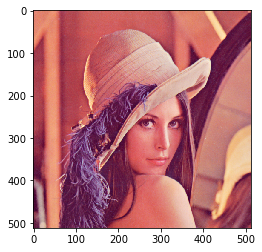

In [5]:
# load the famous Lena image
img = mpimg.imread('../data/lena.png')

# what does it look like?
plt.imshow(img)

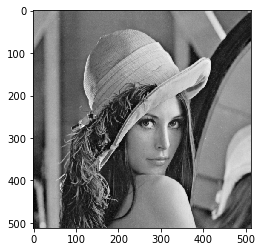

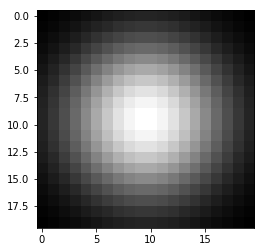

In [9]:
# make it B&W
bw = img.mean(axis=2)
plt.imshow(bw, cmap='gray')
plt.show()

# create a Gaussian filter
W = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        dist = (i - 9.5)**2 + (j - 9.5)**2
        W[i, j] = np.exp(-dist / 50.)

# let's see what the filter looks like
plt.imshow(W, cmap='gray')
plt.show()

In [11]:
# now the convolution
out = convolve2d(bw, W)
plt.imshow(out, cmap='gray')
plt.show()

# what's that weird black stuff on the edges? let's check the size of output
print(out.shape)
# after convolution, the output signal is N1 + N2 - 1

KeyboardInterrupt: 

In [12]:
def convolve2d_1(X, W):
    t0 = datetime.now()
    n1, n2 = X.shape
    m1, m2 = W.shape
    Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
    for i in range(n1):
        for j in range(n2):
            Y[i:i+m1,j:j+m2] += X[i,j]*W
    print("elapsed time:", (datetime.now() - t0))
    return Y

elapsed time: 0:00:01.125274


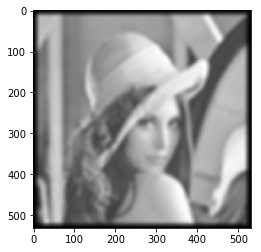

(531, 531)


In [13]:
# now the convolution
out = convolve2d_1(bw, W)
plt.imshow(out, cmap='gray')
plt.show()

# what's that weird black stuff on the edges? let's check the size of output
print(out.shape)
# after convolution, the output signal is N1 + N2 - 1

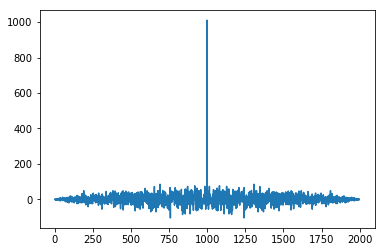

In [14]:
# Autocorrelation in code
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

X = np.random.randn(1000)

C = correlate(X, X)
plt.plot(C)

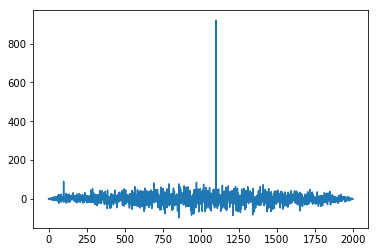

In [16]:
Y = np.empty(1000)
Y[:900] = X[100:]
Y[900:] = X[:100]
C2 = correlate(X, Y)
plt.plot(C2)